In [95]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn import metrics, preprocessing

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
!pip install xgboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
T_train = pd.read_csv('train.csv',index_col=0)
T_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
T_train.shape

(891, 11)

In [4]:
T_test = pd.read_csv('test.csv',index_col=0)
T_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
T_test.shape

(418, 10)

In [6]:
T_test['Survived'] = 0
T_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [7]:
T_test.shape

(418, 11)

In [8]:
T = pd.concat([T_train,T_test])
T.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [9]:
T.shape

(1309, 11)

In [10]:
T.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

In [11]:
T['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [17]:
T['Embarked'].fillna(value="S",inplace=True)

In [18]:
T.isnull().sum()

Age          263
Cabin       1014
Embarked       0
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

In [19]:
T['Fare'].fillna(value=np.mean(T['Fare']),inplace=True)

In [20]:
T.isnull().sum()

Age          263
Cabin       1014
Embarked       0
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

In [21]:
T["Ticket"].value_counts()

CA. 2343            11
CA 2144              8
1601                 8
3101295              7
347082               7
S.O.C. 14879         7
PC 17608             7
347077               7
382652               6
19950                6
347088               6
113781               6
113503               5
W./C. 6608           5
349909               5
PC 17757             5
16966                5
4133                 5
220845               5
C.A. 34651           4
C.A. 2315            4
W./C. 6607           4
PC 17760             4
LINE                 4
36928                4
PC 17755             4
230136               4
113760               4
12749                4
2666                 4
                    ..
112901               1
PC 17473             1
233478               1
248740               1
347062               1
STON/O2. 3101290     1
2543                 1
248746               1
7935                 1
349209               1
2622                 1
374887               1
SOTON/O2 31

In [22]:
T.drop(['Cabin','Ticket'], axis=1, inplace=True)
T.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
PassengerId,,,,,,,,,
1,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1
5,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0


In [23]:
T['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [24]:
name = T["Name"].str.split(", ",expand=True)
name = name [1].str.split(". ",expand=True)
T["Title"] = name[0]

In [25]:
T.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Title
PassengerId,,,,,,,,,,
1,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,Mr
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,Mrs
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,Miss
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,Mrs
5,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,Mr


In [26]:
T['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Jonkheer      1
Capt          1
Dona          1
Sir           1
Don           1
th            1
Lady          1
Mme           1
Name: Title, dtype: int64

In [27]:
T['Age'] = T['Age'].fillna(T.groupby(['Title'])['Age'].transform(np.mean))

In [28]:
T.isnull().sum()

Age         0
Embarked    0
Fare        0
Name        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
Title       0
dtype: int64

In [29]:
T["Family Size"] = T["Parch"] + T["SibSp"] + 1

In [30]:
T.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Title,Family Size
PassengerId,,,,,,,,,,,
1,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,Mr,2
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,Mrs,2
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,Miss,1
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,Mrs,2
5,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,Mr,1


## Applying Naive Bayes

In [31]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

X = T[['Age','Family Size','Pclass']]
Y = T[['Survived']]

model = GaussianNB()
model.fit(X,Y)
expected = T['Survived']
Predicted = model.predict(T[['Survived']])
print(metrics.classification_report(expected,Predicted))
metrics.confusion_matrix(expected,Predicted)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       967
          1       0.26      1.00      0.41       342

avg / total       0.07      0.26      0.11      1309



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0, 967],
       [  0, 342]], dtype=int64)

In [32]:
X.shape,Y.shape

((1309, 3), (1309, 1))

In [33]:
T = pd.get_dummies(T,columns=['Embarked','Pclass','Sex'])
T.head()

,Age,Fare,Name,Parch,SibSp,Survived,Title,Family Size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,
1,22.0,7.2500,"Braund, Mr. Owen Harris",0,1,0,Mr,2,0,0,1,0,0,1,0,1
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,Mrs,2,1,0,0,1,0,0,1,0
3,26.0,7.9250,"Heikkinen, Miss. Laina",0,0,1,Miss,1,0,0,1,0,0,1,1,0
4,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,Mrs,2,0,0,1,1,0,0,1,0
5,35.0,8.0500,"Allen, Mr. William Henry",0,0,0,Mr,1,0,0,1,0,0,1,0,1


In [34]:
T.shape

(1309, 16)

In [35]:
train_data = T.iloc[:891, :]
test_data = T.iloc[891:, :]

In [36]:
train_data.tail()

,Age,Fare,Name,Parch,SibSp,Survived,Title,Family Size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,
887,27.000000,13.00,"Montvila, Rev. Juozas",0,0,0,Rev,1,0,0,1,0,1,0,0,1
888,19.000000,30.00,"Graham, Miss. Margaret Edith",0,0,1,Miss,1,0,0,1,1,0,0,1,0
889,21.774238,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",2,1,0,Miss,4,0,0,1,0,0,1,1,0
890,26.000000,30.00,"Behr, Mr. Karl Howell",0,0,1,Mr,1,1,0,0,1,0,0,0,1
891,32.000000,7.75,"Dooley, Mr. Patrick",0,0,0,Mr,1,0,1,0,0,0,1,0,1


In [37]:
test_data.columns

Index(['Age', 'Fare', 'Name', 'Parch', 'SibSp', 'Survived', 'Title',
       'Family Size', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [38]:
X = train_data[['Age','Family Size','Sex_female', 'Sex_male']]
Y = train_data[['Survived']]

model = GaussianNB()
model.fit(X,Y)
expected = train_data['Survived']
Predicted = model.predict(train_data[['Survived']])
print(metrics.classification_report(expected,Predicted))
metrics.confusion_matrix(expected,Predicted)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       549
          1       0.38      1.00      0.55       342

avg / total       0.15      0.38      0.21       891



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0, 549],
       [  0, 342]], dtype=int64)

In [40]:
x_train = train_data.drop(['Survived','Name','Title'],axis=1)
y_train = train_data['Survived']

x_test = test_data.drop(['Survived','Name','Title'],axis=1)
y_test= test_data["Survived"]

In [41]:
import statsmodels.api as sm

In [42]:
# Logistic regression model using GLM
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -390.10
Date:                Tue, 22 Jan 2019   Deviance:                       780.20
Time:                        12:06:46   Pearson chi2:                     906.
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7132      0.129      5.511      0.000       0.460       0.967
Age            -0.0420      0.008     -5.333      0.000      -0.057      -0.027
Fare            0.0022      0.002      0.891      0.373      -0.003       0.007
Parch          -0.1878      0.106     -1.777      0.075      -0.395       0.019
SibSp          -0.4361      0.108     -4.036      0.000      -0.648      -0.224
Family Size     0.0894      0.050      1.782      0.075      -0.009       0.188
Embarked_C      0.4323      0.186      2.321      0.020       0.067       0.797
Embarked_Q      0.2927      0.243      1.204      0.229      -0.184       0.769
Embarked_S     -0.0117      0.144     -0.081      0.935      -0.293       0.270
Pclass_1        1.3006      0.206      6.328      0.000       0.898       1.703
Pclass_2        0.3233      0.153      2.109      0.035       0.023       0.624
Pclass_3       -0.9107      0.134     -6.773      0.000      -1.174      -0.647
Sex_female      1.7054      0.131     13.044      0.000       1.449       1.962
Sex_male       -0.9922      0.108     -9.220      0.000      -1.203      -0.781
===============================================================================
"""

In [43]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

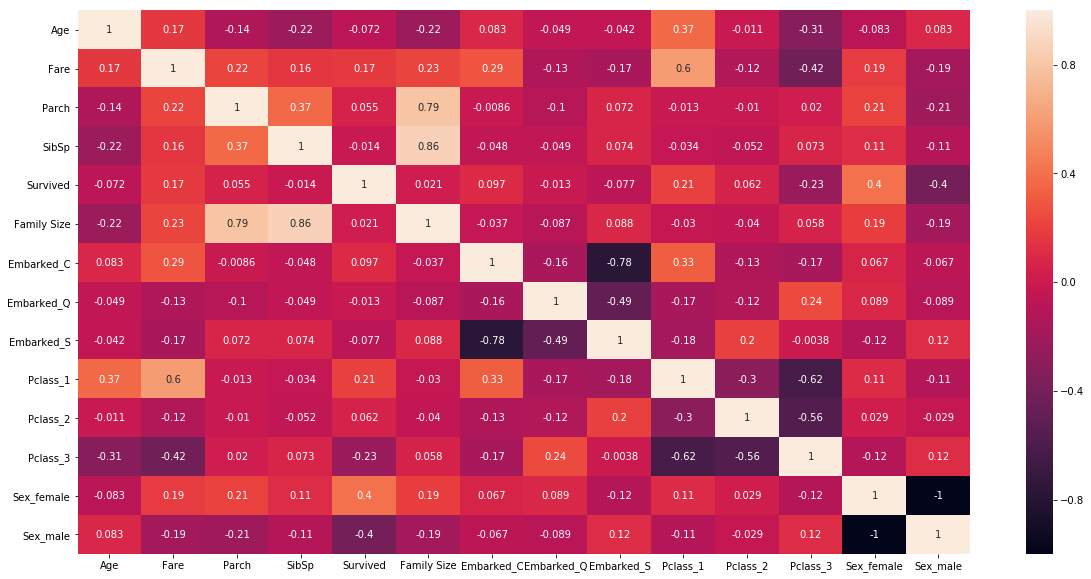

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(T.corr(),annot = True)

In [105]:
x_train.columns

Index(['Age', 'Fare', 'Parch', 'SibSp', 'Family Size', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [117]:
x_train = train_data.drop(['Survived','Name','Title', 'Sex_female', 'Sex_male'],axis=1)
y_train = train_data['Survived']

x_test = test_data.drop(['Survived','Name','Title','Sex_female', 'Sex_male'],axis=1)
y_test= test_data["Survived"]

In [ ]:
from sklea

In [38]:
rfc = RandomForestClassifier(n_estimators=500, max_features=3)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)

df = pd.DataFrame(pred)
df.columns = ['Survived']
df.to_csv('Answers3.csv',index=False)

In [118]:
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
pred_lr = model_lr.predict(x_test)
metrics.accuracy_score(y_test,pred_lr)

0.69377990430622

In [119]:
dtree = DecisionTreeClassifier()
model_dtree = dtree.fit(x_train,y_train)
pred_dtree = model_dtree.predict(x_test)
metrics.accuracy_score(y_test, pred_dtree)

0.6148325358851675

In [120]:
knn = KNeighborsClassifier()
model_knn = knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
metrics.accuracy_score(y_test, pred_knn)

0.6220095693779905

In [121]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)
metrics.accuracy_score(y_test, pred_rf)

0.5933014354066986

In [122]:
# voting classifier

voting_model = VotingClassifier([('lr', lr),('dtree', dtree),('knn',knn),('rf', rf)], voting='hard')
voting_model.fit(x_train, y_train)
voting_predict = voting_model.predict(x_test)
metrics.accuracy_score(y_test, voting_predict)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.69377990430622

In [123]:
bagg = BaggingClassifier()
bagg_param = {
    'n_estimators':[5,10,15,20,25],
    'oob_score':[True,False],
    'random_state':[123]
}

grid_search = GridSearchCV(estimator=bagg, param_grid=bagg_param, cv=5)
cv_grid = grid_search.fit(x_train,y_train)
cv_grid.best_params_

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probabl

{'n_estimators': 20, 'oob_score': True, 'random_state': 123}

In [124]:
bagg_dt = BaggingClassifier(base_estimator=dtree, n_estimators=20, bootstrap=True, oob_score=True, random_state=123)
model_bagg_dt = bagg_dt.fit(x_train,y_train)
pred_bagg_dt = model_bagg_dt.predict(x_test)
metrics.accuracy_score(y_test, pred_bagg_dt)

0.6267942583732058

In [125]:
bagg_rf = BaggingClassifier(base_estimator=rf,n_estimators=20, bootstrap=True, oob_score=True, random_state=123)
model_bagg_rf = bagg_rf.fit(x_train,y_train)
pred_bagg_rf = model_bagg_rf.predict(x_test)
metrics.accuracy_score(y_test, pred_bagg_rf)

0.569377990430622

In [126]:
bagg_knn = BaggingClassifier(base_estimator=knn,n_estimators=20, bootstrap=True, oob_score=True, random_state=123)
model_bagg_knn = bagg_knn.fit(x_train,y_train)
pred_bagg_knn = model_bagg_knn.predict(x_test)
metrics.accuracy_score(y_test, pred_bagg_knn)

0.6196172248803827

In [127]:
bagg_lr = BaggingClassifier(base_estimator=lr,n_estimators=20, bootstrap=True, oob_score=True, random_state=123)
model_bagg_lr = bagg_lr.fit(x_train,y_train)
pred_bagg_lr = model_bagg_lr.predict(x_test)
metrics.accuracy_score(y_test, pred_bagg_lr)

0.6889952153110048

In [134]:
adb_lr = AdaBoostClassifier(lr, n_estimators=10, learning_rate=1)
adb_lr.fit(x_train,y_train)
pred_adb_lr = adb_lr.predict(x_test)
metrics.accuracy_score(y_test,pred_adb_lr)

0.8253588516746412

In [137]:
df = pd.DataFrame(pred_adb_lr)
df.columns = ['Survived']
df.to_csv('Answers.csv',index=False)